# **Intro to Machine Learning: Demo**

This is a step-by-step outline for how you would typically build a machine learning workflow using a notebook like **Google Colab** or **Jupyter Notebooks**. This outline will contain multiple comments explaining what each aspect of code does, and it will also include documentation of any necessary functions so that you can see what the functions actually do.

# Let's get started!

## The Problem:
The Diamonds dataset contains information about diamonds, including their characteristics and prices. It includes features such as carat weight, cut, color, clarity, depth, table, price, length, width, and depth in mm.


Features and Characteristics

carat: Carat weight of the diamond (numerical)


* cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal) (categorical)
* color: Diamond color, from D (best) to J (worst) (categorical)
* clarity: A measurement of how clear the diamond is (categorical)
* depth: Total depth percentage (numerical)
* table: Width of the top of the diamond relative to the widest point (numerical)
* price: Price in US dollars (numerical)
* length: Length in mm (numerical)
* width: Width in mm (numerical)
* height: Height in mm (numerical)

It is your job to predict the prices of a diamond given its characteristics!

# **Contents of this Lesson**
##1: Important Libraries you need
##2: Pandas Data Manipulation
##3: Imputation
##4: Label Encoding
##5: Splitting Data Into Testing and Training Sets
##6: Machine Learning Models and Model Evaluation
##7: Feature Selection


#**1: Important Libraries**

In this section you will import all the necessary libraries. There is a comment next to each line explaining what the library does

In [1]:
# Import necessary libraries
import pandas as pd  # Import the pandas library for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
from sklearn.linear_model import LinearRegression  # Import linear regression model
from sklearn.ensemble import RandomForestRegressor  # Import random forest regression model
from sklearn.tree import DecisionTreeRegressor  # Import decision tree regression model
from xgboost import XGBRegressor  # Import XGBoost regression model
from sklearn.metrics import root_mean_squared_error,mean_squared_error, r2_score  # Import function to calculate the mean squared error (MSE), and R^2 value
from sklearn.model_selection import cross_val_score  # Import cross-validation to evaluate models
from sklearn.feature_selection import SelectKBest, f_regression  # Import feature selection methods based on statistical tests
from sklearn.impute import SimpleImputer  # Import imputer to handle missing data by filling in values
from sklearn.preprocessing import OneHotEncoder  # Import encoder to convert categorical data into numerical format
import numpy as np  # Import numpy for numerical operations and working with arrays
import seaborn as sns #
from sklearn.feature_selection import RFE #
import matplotlib.pyplot as plt # Import matplotlib for data visualization


#**2: Pandas Data Manipulation**

##In this section, we will go through how you can set up your dataset so that it is ready for any machine learning model!

Here is documentation of pandas for future reference: https://pandas.pydata.org/docs/getting_started/index.html

In [2]:
# Load the diamonds dataset from Seaborn
df1 = sns.load_dataset('diamonds')

In [3]:
#RUN THIS CODE BUT IGNORE THE CONTENTS OF IT - this is just me getting the dataset ready for you to play around with
np.random.seed(42)
missing_sample = np.random.choice(df1.index, size=452, replace=False)
df1.loc[missing_sample, 'depth'] = np.nan
df1 = df1.drop(columns=['cut'])
df1.rename(columns={'x': 'length'}, inplace=True)
df1.rename(columns={'y': 'width'}, inplace=True)
df1.rename(columns={'z': 'height'}, inplace=True)
df = df1.copy()

In [4]:
# Show the first 5 rows of the dataset
df.head()

,carat,color,clarity,depth,table,price,length,width,height
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Now that we have loaded in the data successfully, let's explore our data a bit and see if there is anything wrong with it.

Some things you have to look out for are:
1. Missing data
2. Duplicate data
3. Inconsistent data format (ex: dates aren't all in the same format - 10/1/2024 vs Oct. 1, 2024)
4. Outliers
5. And everything on this list: https://www.process.st/templates/data-cleaning-checklist/

Let's start by checking if there is any missing values in the data

In [5]:
# Check for missing values in the dataset
missing_values_df = df.isnull().sum()

# Display missing values in a DataFrame for clearer viewing
missing_values_summary = pd.DataFrame(missing_values_df, columns=["Missing Value Count"])
print(missing_values_summary)


         Missing Value Count
carat                      0
color                      0
clarity                    0
depth                    452
table                      0
price                      0
length                     0
width                      0
height                     0


# **Step 3: Imputation**

Now that you know that you have a few missing values in the depth column, you can start thinking about how you can essentially predict what those values are.

There are a few ways to do this when completing a machine learning problem. The simplest way is to take the average (mean) of the entire column and placing that value into the empty spaces in your dataset.

More complex ways of imputing data is creating a new machine learning model that will predict what the missing value is based on the value's relationship to the other columns in the dataset. (we will learn more about this next week!)

This time, let's just take the mean and insert that value for all the missing values

In [6]:
#Fill in the blanks with the mean of the whole column
df['depth'] = df['depth'].fillna(df['depth'].mean()) # Fill in the blank here

Let's check if we fixed our missing value problem

In [7]:
missing_values_df = df.isnull().sum()
missing_values_summary = pd.DataFrame(missing_values_df, columns=["Missing Values"])
print(missing_values_summary)

         Missing Values
carat                 0
color                 0
clarity               0
depth                 0
table                 0
price                 0
length                0
width                 0
height                0


# **Step 4: One-Hot Encoding**

Machine learning models can't understand categorical values (or words) because they only understand numbers! Because of this issue, everytime you have categorical values you essentially have to transform them into something a machine learning model can understand.

One way to change categorical columns into something a machine learning model can understand, is to make each unique value of your data into it's own column and assign it a boolean value (true or false, or 1 or 0)

Find out what the categorical columns are in your dataset and fill them in. Run your code and see how your dataset changes (:

In [8]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True) #Fill in the missing values

#Let's look at the 5 first rows again
df.head()

,carat,depth,table,price,length,width,height,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,True,False,False,False,False,False,True,False


# **Step 5: Splitting Data Into Testing and Training Sets**

Now that your dataset is all cleaned up, you can start splitting your dataset into training and testing splits.

If you are still confused on why you need to split training and testing data, here is a short video that explains it pretty well: https://www.youtube.com/watch?v=dSCFk168vmo

The thing you are trying to predict in this data science problem is the price of diamonds given the different characteristics the diamond has.

What is the target variable?

In [9]:
# Separate features (X) and target (y)
X = df.drop('price', axis=1) #fill in the blank
y = df['price'] #fill in the blank

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape

((43152, 19), (10788, 19))

#**6: Machine Learning Models**

Now that you have split your data set, you are now ready to build your machine learning model!!!

There are many models to choose from. Today, we will cover a few basic ones that are fairly common

# **6.1: Linear Regression**

Linear Regression is a simple and widely used model for predicting a continuous target variable. It assumes a linear relationship between the input features (independent variables) and the target (dependent variable).

How It Works:
1. The model fits a straight line through the data points that best represents the relationship between features and the target.
2. Predictions are made based on the line equation.

Key Points:
Advantages: Simple, interpretable, and fast for small datasets.           
Disadvantages: Assumes a linear relationship, sensitive to outliers.

Here is documentation of linear regression with Scikit Learn for future reference:     

 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [10]:
# Initialize and fit Linear Regression model
lr = LinearRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr) #MSE
r2_lr = r2_score(y_test, y_pred_lr) #R^2 Calculation

#Model Evaluation
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")

Linear Regression RMSE: 1140.843290816782
Linear Regression R-squared: 0.9181268143325259


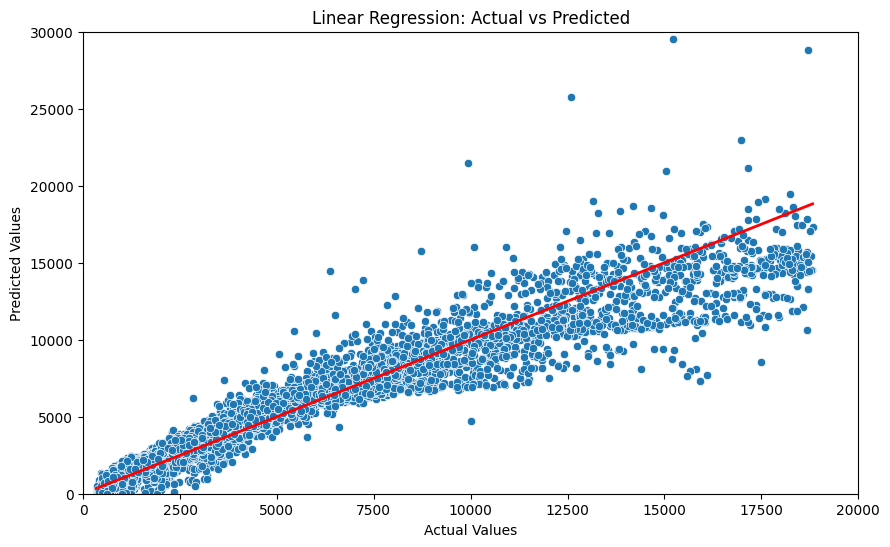

In [11]:
#Let's try plotting our results!

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect fit line
plt.xlim(0, 20000)  # Set x-axis limit
plt.ylim(0, 30000)  # Set y-axis limit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


# **6.2: Decision Tree**
A Decision Tree is a model used for both classification and regression tasks. It works by splitting the dataset into branches based on feature values, where each split improves prediction accuracy. The model predicts outcomes at the leaf nodes.

How It Works:
1. The model chooses the best feature to split the data at each node.
2. Splitting continues until stopping criteria (e.g., max depth) are met.
3. Final predictions are made based on the values at the leaf nodes.

Key Points:
Advantages: Easy to interpret, handles non-linear data.

Disadvantages: Can overfit and be sensitive to data changes.

Here is documentation of Decision Tree Regressor with Scikit Learn for future reference:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


In [12]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt) #R^2 Calculation

#Model Evaluation
print(f"Random Forest RMSE: {rmse_dt}")
print(f"Random Forest R-squared: {r2_dt}")

Random Forest RMSE: 751.8393407992014
Random Forest R-squared: 0.9644417976193229


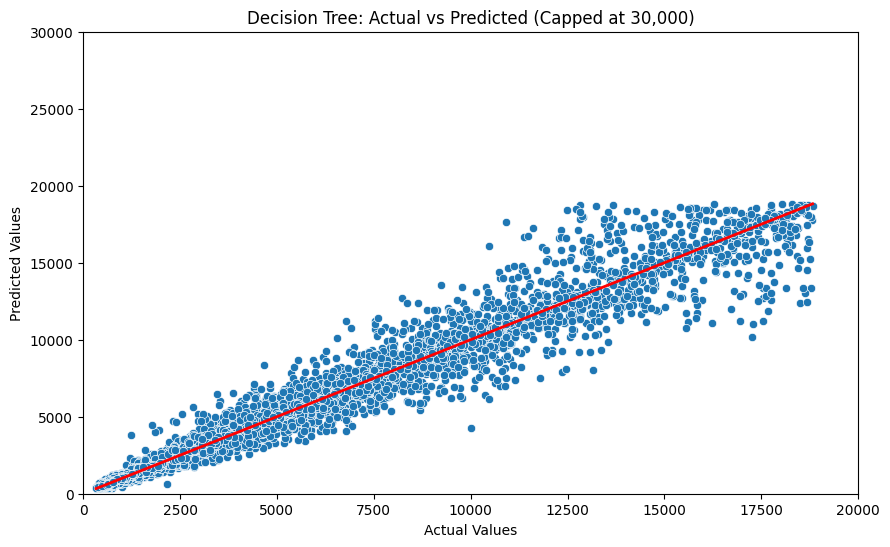

In [ ]:
#Let's try plotting our results!

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect fit line
plt.xlim(0, 20000)  # Set x-axis limit
plt.ylim(0, 30000)  # Set y-axis limit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted (Capped at 30,000)')
plt.show()

# **6.3 Random Forest**
A Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It works for both classification and regression tasks.

How It Works:
1. The algorithm creates many decision trees using random subsets of the data and features.
2. For classification, it takes the majority vote across the trees; for regression, it averages the predictions.
3. This reduces the chance of overfitting and improves generalization.

Key Points:                                                                  
Advantages: More accurate and robust than a single decision tree, less prone to overfitting.                                                              
Disadvantages: Slower and harder to interpret than a single tree.

Here is documentation of Decision Tree Regressor with Scikit Learn for future reference:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html



In [13]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf) #R^2 Calculation

#Model Evaluation
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest RMSE: 555.2081096984551
Random Forest R-squared: 0.9806089509138629


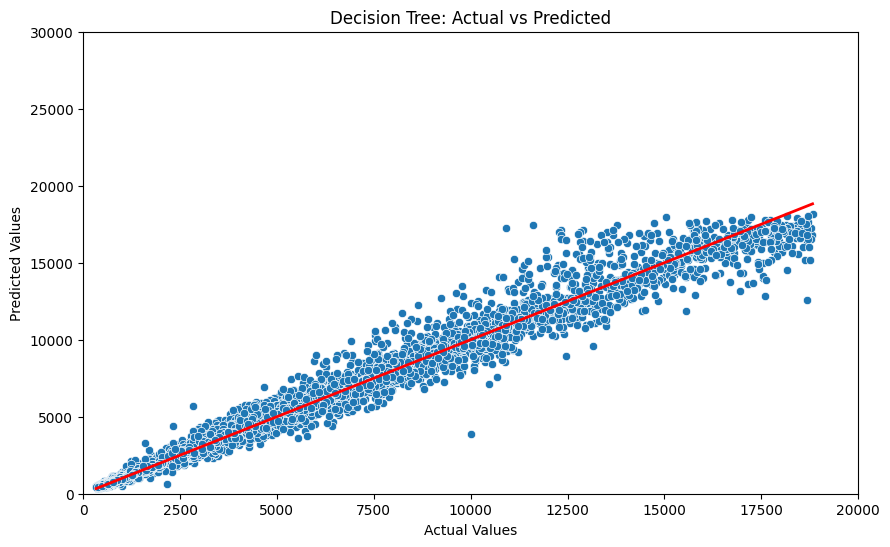

In [14]:
#Let's try plotting our results!

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect fit line
plt.xlim(0, 20000)  # Set x-axis limit
plt.ylim(0, 30000)  # Set y-axis limit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()

# 7: Feature Selection

Feature Selection is the process of selecting a subset of relevant features (predictor variables) for model building. It aims to improve model performance by reducing overfitting, decreasing computational cost, and enhancing interpretability.

# 7.1: Filter Method
The Filter Method selects features based on statistical criteria, independent of the machine learning model. It ranks features based on their correlation or statistical significance with the target variable, then selects the most relevant ones for modeling.

Common Filter Methods:
1. Correlation Coefficient: Measures the linear relationship between features and the target.
2. Chi-Square Test: Evaluates the relationship between categorical features and the target.
3. SelectKBest: Selects the top k features based on statistical tests like chi-square for classification or f_regression for regression.

Here is documentation of the filter method for future reference:

https://scikit-learn.org/stable/modules/feature_selection.html

In [15]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression)
X1,y1 = X, y
X_selected = selector.fit_transform(X1, y1)

# Check which features were selected|
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['carat', 'table', 'length', 'width', 'height', 'color_E', 'color_I',
       'color_J', 'clarity_VVS1', 'clarity_SI2'],
      dtype='object')


### Let's run the model again using the selected features
### Copy and paste the values you got into the X list below

In [16]:
# Separate features (X) and target (y)
X1 = df.drop('price', axis=1)
X1 = X1[['carat', 'table', 'length', 'width', 'height', 'color_E', 'color_I',
       'color_J', 'clarity_VVS1', 'clarity_SI2']] # fill in the blank
y2 = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf) #R^2 Calculation

#Model
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest RMSE: 1041.4062459737006
Random Forest R-squared: 0.9317771183076916


# 7.2: Wrapper Method
The Wrapper Method selects features by evaluating their performance with a machine learning model. It tests different subsets of features, trains a model on each subset, and chooses the set that leads to the best model performance. This is done using techniques like Recursive Feature Elimination (RFE), where less important features are removed iteratively until the best subset remains. The method relies on the interaction between the features and the model, often using cross-validation to ensure robust feature selection.

Here is documentation of the filter method for future reference:

https://scikit-learn.org/stable/modules/feature_selection.html

In [17]:
# Using a random forest model to evaluate feature importance
lr = LinearRegression()
lr = RFE(estimator=lr)
X2, y2 = X, y
X_lr = lr.fit_transform(X2, y2)

# Selected features by RFE
lr_selected_features = X.columns[lr.support_]
print(f"Wrapper Method (RFE) - Selected Features: {lr_selected_features}")

Wrapper Method (RFE) - Selected Features: Index(['carat', 'length', 'color_H', 'color_I', 'color_J', 'clarity_VS2',
       'clarity_SI1', 'clarity_SI2', 'clarity_I1'],
      dtype='object')


In [18]:
# Separate features (X) and target (y)
X = df.drop('price', axis=1)
X = X[['carat', 'length', 'color_H', 'color_I', 'color_J', 'clarity_VS2',
       'clarity_SI1', 'clarity_SI2', 'clarity_I1']] #fill in the blank here
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf) #MSE Calculation
r2_rf = r2_score(y_test, y_pred_rf) #R^2 Calculation

#Model
print(f"Random Forest MSE: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest MSE: 760.0503343387344
Random Forest R-squared: 0.9636608794720627


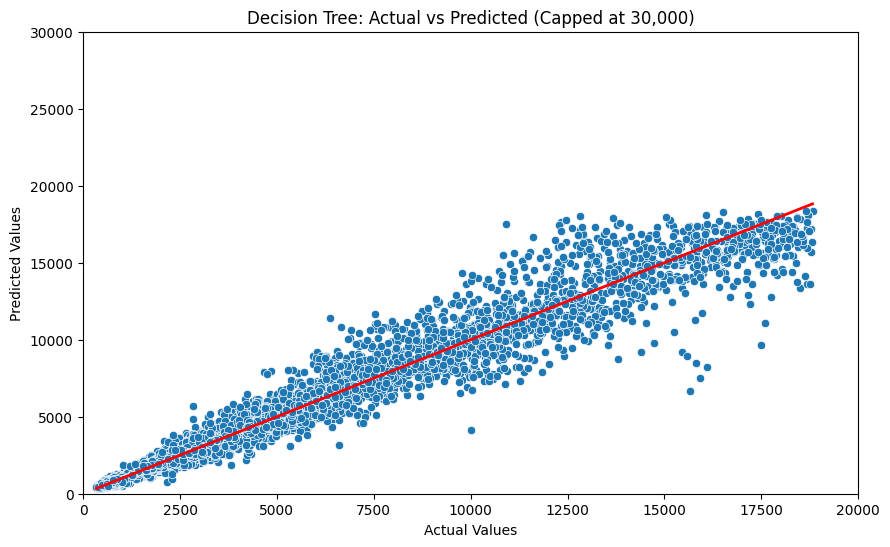

In [19]:
#Let's try plotting our results!

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect fit line
plt.xlim(0, 20000)  # Set x-axis limit
plt.ylim(0, 30000)  # Set y-axis limit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted (Capped at 30,000)')
plt.show()

# Competition Time!!!

Penguins Dataset

Penguin Dataset Regression Problem
In this machine learning task, we aim to predict the body mass of penguins (in grams) based on other physical attributes using a regression model. The Penguin dataset from Seaborn provides numerical and categorical features that can help build a predictive model to estimate a penguin's weight.

### Features:
#### Numerical features:

1. bill_length_mm: Length of the penguin's bill (beak) in millimeters.
2. bill_depth_mm: Depth of the penguin's bill in millimeters.
3. flipper_length_mm: Length of the penguin's flipper in millimeters.
4. Target: body_mass_g (body mass in grams) is the target variable to predict.

####Categorical features:

1. species: The species of the penguin (Adelie, Gentoo, Chinstrap).
2. island: Island where the penguin was observed.
3. sex: The sex of the penguin (male or female).

In [30]:
# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
